In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Objective
To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

In [4]:
data.shape

(1000, 8)

# Predicting academic performance is an important task for the students in university, college, and school, etc. The factors which affect the student’s academic performance are class quizzes, assignments, lab exams, mid, and final exams. The student’s academic performance should be informed to the class teacher in advance that will decrease the student’s dropout and increase the performance. In this paper, machine learning classification algorithms such as Support Vector Machine (SVM), and Logistic  are implemented to predict the student’s academic performance. The performance of an algorithm has been evaluated based on confusion matrix, accuracy, precision, recall, and F1 score. The obtained result shows that the svm classification algorithm performs better.

In [5]:
data.rename(columns={'race/ethnicity':'ethnicity','parental level of education':'parent eduction','test preparation course':'pre'},inplace=True)

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
data.isnull().sum()

gender             0
ethnicity          0
parent eduction    0
lunch              0
pre                0
math score         0
reading score      0
writing score      0
dtype: int64

In [8]:
numerical=data.select_dtypes(include=np.number)
print(len(numerical.columns))
numerical.columns

3


Index(['math score', 'reading score', 'writing score'], dtype='object')

In [9]:
df_numerical=['math score', 'reading score', 'writing score']
for i in df_numerical:
    print("-------------------------------")
    print("Value Counts of  {}." .format( data[i].value_counts()))

-------------------------------
Value Counts of  65    36
62    35
69    32
59    32
61    27
      ..
24     1
26     1
28     1
33     1
0      1
Name: math score, Length: 81, dtype: int64.
-------------------------------
Value Counts of  72    34
74    33
64    32
67    30
73    30
      ..
26     1
32     1
40     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64.
-------------------------------
Value Counts of  74    35
70    33
68    31
73    28
80    27
      ..
23     1
28     1
35     1
15     1
10     1
Name: writing score, Length: 77, dtype: int64.


In [10]:
categorical=data.select_dtypes(include=object)
print(len(categorical.columns))
categorical.columns

5


Index(['gender', 'ethnicity', 'parent eduction', 'lunch', 'pre'], dtype='object')

In [11]:
categorical=['gender', 'ethnicity', 'parent eduction', 'lunch', 'pre']
for i in categorical:
    print("-------------------------------")
    print("Value Counts of  {}." .format( data[i].value_counts()))

-------------------------------
Value Counts of  female    518
male      482
Name: gender, dtype: int64.
-------------------------------
Value Counts of  group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64.
-------------------------------
Value Counts of  some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent eduction, dtype: int64.
-------------------------------
Value Counts of  standard        645
free/reduced    355
Name: lunch, dtype: int64.
-------------------------------
Value Counts of  none         642
completed    358
Name: pre, dtype: int64.


In [12]:
data.head()

,gender,ethnicity,parent eduction,lunch,pre,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:title={'center':'Gender'}>

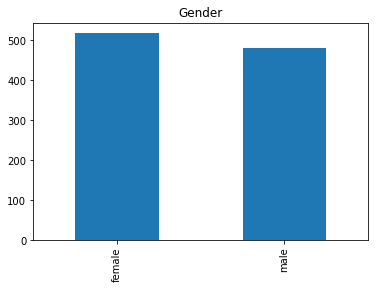

In [13]:
data['gender'].value_counts().plot(kind='bar',title='Gender')

<AxesSubplot:title={'center':'Race'}>

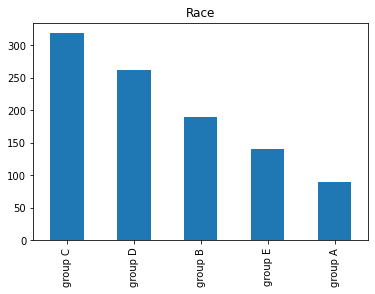

In [14]:
data['ethnicity'].value_counts().plot(kind='bar',title='Race')

<AxesSubplot:title={'center':'Eduction'}>

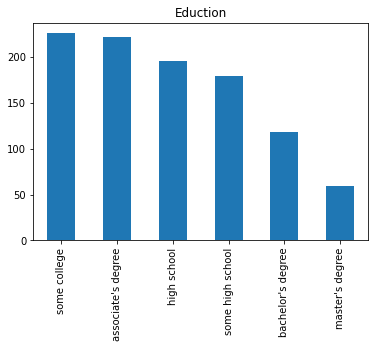

In [15]:
data['parent eduction'].value_counts().plot(kind='bar',title='Eduction')

<AxesSubplot:title={'center':'Lunch'}>

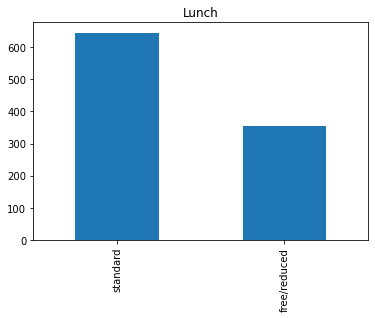

In [16]:
data['lunch'].value_counts().plot(kind='bar',title=('Lunch'))

<AxesSubplot:title={'center':'Test_pre'}>

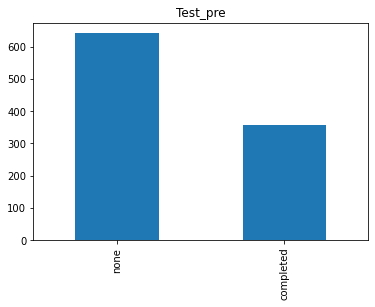

In [17]:
data['pre'].value_counts().plot(kind='bar',title='Test_pre')

(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

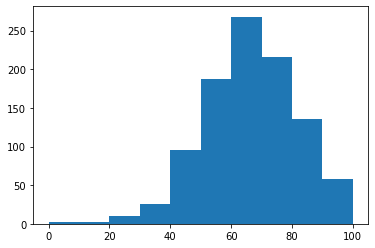

In [18]:
plt.hist(data['math score'])

(array([  4.,   7.,  22.,  64., 140., 182., 237., 168., 120.,  56.]),
 array([ 17. ,  25.3,  33.6,  41.9,  50.2,  58.5,  66.8,  75.1,  83.4,
         91.7, 100. ]),
 <BarContainer object of 10 artists>)

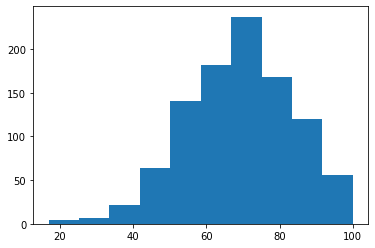

In [19]:
plt.hist(data['reading score'])

(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

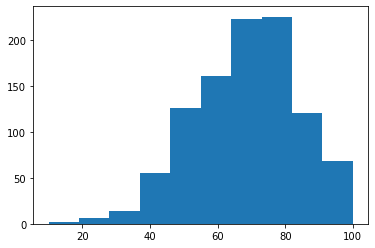

In [20]:
plt.hist(data['writing score'])

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


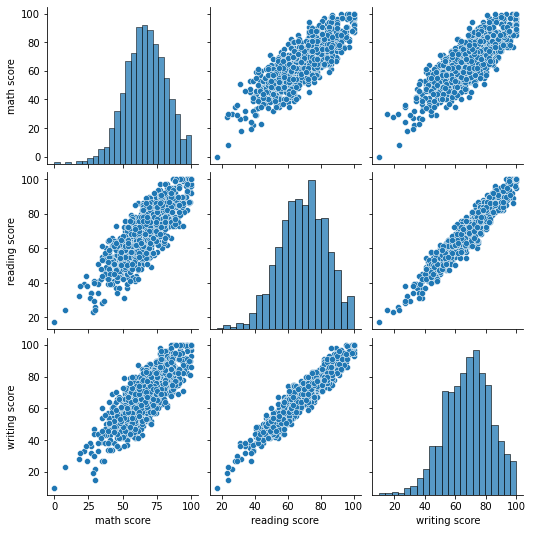

In [21]:
sns.pairplot(data.iloc[:,:])
data.corr()

In [22]:
data["total_score"]=data["math score"]+data["reading score"]+data["writing score"]
data.head()

,gender,ethnicity,parent eduction,lunch,pre,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [23]:
# Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import chi2_contingency

In [24]:
scores = data.loc[:,['math score','reading score','writing score']].transpose()

Chisquares_results=chi2_contingency(scores)
print("Chi-Squared test returns P-value of", Chisquares_results[1])

Chi-Squared test returns P-value of 1.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           1000 non-null   object
 1   ethnicity        1000 non-null   object
 2   parent eduction  1000 non-null   object
 3   lunch            1000 non-null   object
 4   pre              1000 non-null   object
 5   math score       1000 non-null   int64 
 6   reading score    1000 non-null   int64 
 7   writing score    1000 non-null   int64 
 8   total_score      1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [26]:
data["average_score"] = data.loc[:,['math score','reading score','writing score']].mean(axis=1).round(1)
data

,gender,ethnicity,parent eduction,lunch,pre,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7
1,female,group C,some college,standard,completed,69,90,88,247,82.3
2,female,group B,master's degree,standard,none,90,95,93,278,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3
4,male,group C,some college,standard,none,76,78,75,229,76.3
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.0
996,male,group C,high school,free/reduced,none,62,55,55,172,57.3
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.0
998,female,group D,some college,standard,completed,68,78,77,223,74.3


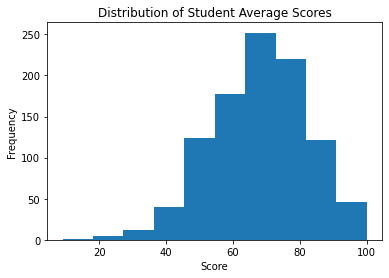

In [27]:
plt.hist(data['average_score'])
plt.title('Distribution of Student Average Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [28]:
def NewGrade(average_score):
    if (average_score>=80): return "A"
    if (average_score>=70): return "B"
    if (average_score>=60): return "C"
    if (average_score>=50): return "D"
    if (average_score>=40): return "E"
    else: return "F"
data["grade"]=data.apply(lambda x: NewGrade(x["average_score"]),axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           1000 non-null   object 
 1   ethnicity        1000 non-null   object 
 2   parent eduction  1000 non-null   object 
 3   lunch            1000 non-null   object 
 4   pre              1000 non-null   object 
 5   math score       1000 non-null   int64  
 6   reading score    1000 non-null   int64  
 7   writing score    1000 non-null   int64  
 8   total_score      1000 non-null   int64  
 9   average_score    1000 non-null   float64
 10  grade            1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


In [30]:
corr=data.corr()
corr

,math score,reading score,writing score,total_score,average_score
math score,1.000000,0.817580,0.802642,0.918746,0.918730
reading score,0.817580,1.000000,0.954598,0.970331,0.970328
writing score,0.802642,0.954598,1.000000,0.965667,0.965680
total_score,0.918746,0.970331,0.965667,1.000000,0.999998
average_score,0.918730,0.970328,0.965680,0.999998,1.000000


<AxesSubplot:>

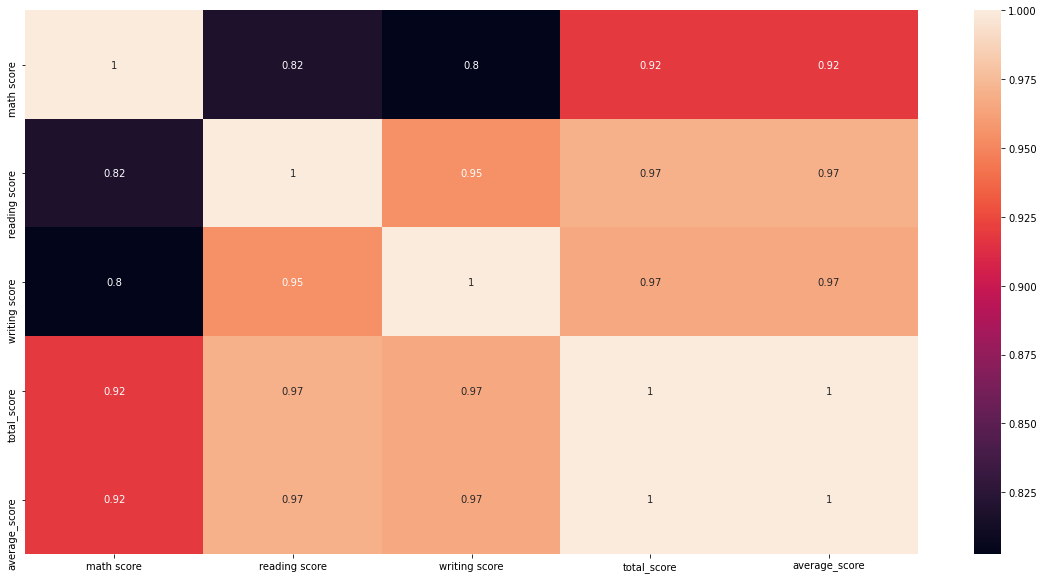

In [31]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           1000 non-null   object 
 1   ethnicity        1000 non-null   object 
 2   parent eduction  1000 non-null   object 
 3   lunch            1000 non-null   object 
 4   pre              1000 non-null   object 
 5   math score       1000 non-null   int64  
 6   reading score    1000 non-null   int64  
 7   writing score    1000 non-null   int64  
 8   total_score      1000 non-null   int64  
 9   average_score    1000 non-null   float64
 10  grade            1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
for i in categorical:
    data[i]=le.fit_transform(data[i])

In [35]:
data.head()

,gender,ethnicity,parent eduction,lunch,pre,math score,reading score,writing score,total_score,average_score,grade
0,0,1,1,1,1,72,72,74,218,72.7,B
1,0,2,4,1,0,69,90,88,247,82.3,A
2,0,1,3,1,1,90,95,93,278,92.7,A
3,1,0,0,0,1,47,57,44,148,49.3,E
4,1,2,4,1,1,76,78,75,229,76.3,B


<AxesSubplot:>

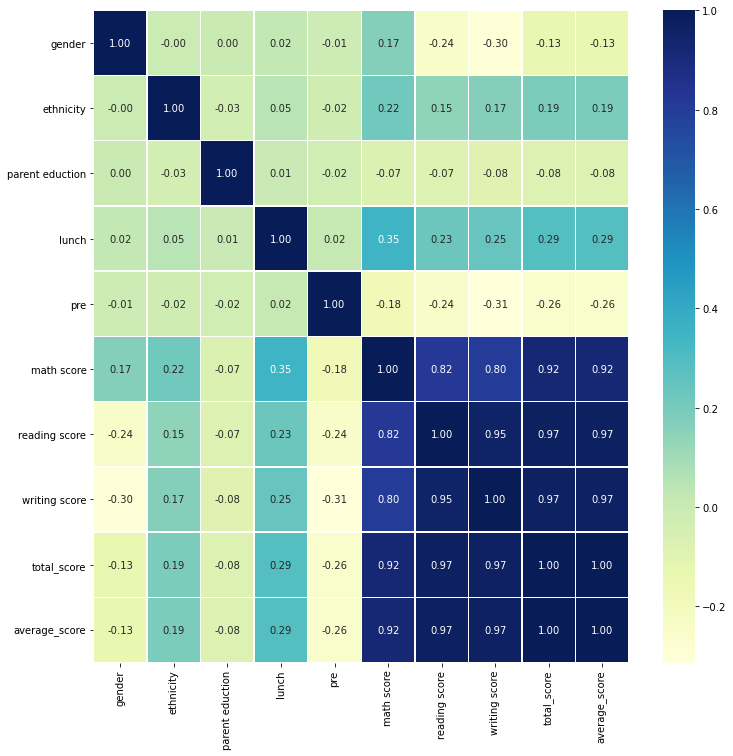

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True
           ,linewidths=0.5
           ,fmt=".2f"
           ,cmap="YlGnBu")

In [37]:
data.drop("total_score",axis=1,inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           1000 non-null   int32  
 1   ethnicity        1000 non-null   int32  
 2   parent eduction  1000 non-null   int32  
 3   lunch            1000 non-null   int32  
 4   pre              1000 non-null   int32  
 5   math score       1000 non-null   int64  
 6   reading score    1000 non-null   int64  
 7   writing score    1000 non-null   int64  
 8   average_score    1000 non-null   float64
 9   grade            1000 non-null   object 
dtypes: float64(1), int32(5), int64(3), object(1)
memory usage: 58.7+ KB


In [39]:
data["grade"]=le.fit_transform(data["grade"])

In [40]:
data.head()

,gender,ethnicity,parent eduction,lunch,pre,math score,reading score,writing score,average_score,grade
0,0,1,1,1,1,72,72,74,72.7,1
1,0,2,4,1,0,69,90,88,82.3,0
2,0,1,3,1,1,90,95,93,92.7,0
3,1,0,0,0,1,47,57,44,49.3,4
4,1,2,4,1,1,76,78,75,76.3,1


In [41]:
x=data.drop('grade',axis=1)
y=data['grade']
x.shape
y.shape

(1000,)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=25)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(670, 9)
(330, 9)
(670,)
(330,)


In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
print("Training Accuracy :", lr.score(x_train, y_train)*100)
print("Testing Accuracy :", lr.score(x_test, y_test)*100)

Training Accuracy : 96.56716417910448
Testing Accuracy : 92.42424242424242


In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [47]:
cm

array([[65,  5,  0,  0,  0,  0],
       [ 1, 73,  3,  0,  0,  0],
       [ 0,  1, 78,  1,  0,  0],
       [ 0,  0,  7, 62,  1,  0],
       [ 0,  0,  0,  5, 20,  0],
       [ 0,  0,  0,  0,  1,  7]], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc,roc_auc_score

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        70
           1       0.92      0.95      0.94        77
           2       0.89      0.97      0.93        80
           3       0.91      0.89      0.90        70
           4       0.91      0.80      0.85        25
           5       1.00      0.88      0.93         8

    accuracy                           0.92       330
   macro avg       0.94      0.90      0.92       330
weighted avg       0.93      0.92      0.92       330



In [53]:
from sklearn.svm import SVC

In [54]:
svc=SVC(kernel="poly")
svc.fit(x_train,y_train)

SVC(kernel='poly')

In [55]:
y_pred=svc.predict(x_test)

In [56]:
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[62  8  0  0  0  0]
 [ 1 72  4  0  0  0]
 [ 0  3 75  2  0  0]
 [ 0  0 15 55  0  0]
 [ 0  0  0  4 21  0]
 [ 0  0  0  0  0  8]]


In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc,roc_auc_score

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        70
           1       0.87      0.94      0.90        77
           2       0.80      0.94      0.86        80
           3       0.90      0.79      0.84        70
           4       1.00      0.84      0.91        25
           5       1.00      1.00      1.00         8

    accuracy                           0.89       330
   macro avg       0.93      0.90      0.91       330
weighted avg       0.90      0.89      0.89       330



In [59]:
svc.score(x_train, y_train)

0.9298507462686567

In [60]:
svc.score(x_test, y_test)

0.8878787878787879